In [36]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score

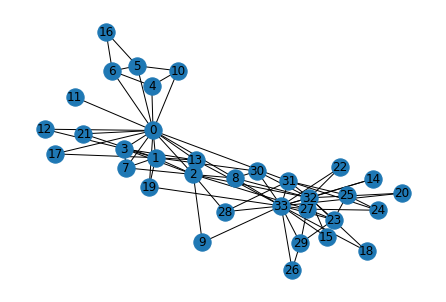

In [37]:
G_karate = nx.karate_club_graph()
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, with_labels=True, pos = pos, cmap = plt.get_cmap("rainbow"))

In [38]:
n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print(n, m)
print(nx.number_connected_components(G_karate))

34 78
1


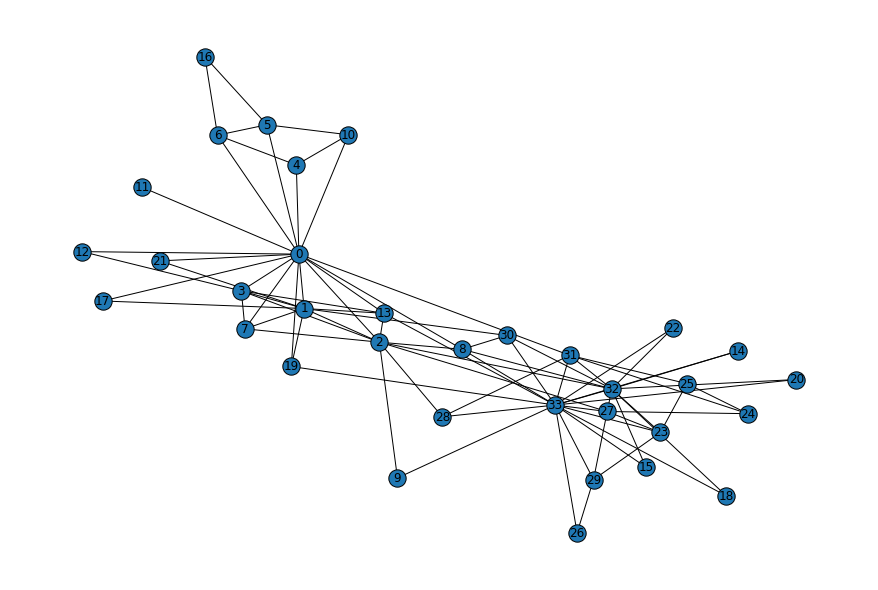

In [39]:
plt.figure(figsize=(12, 8))
nx.draw(G_karate, with_labels=True, pos = pos)
plt.gca().collections[0].set_edgecolor("#000000")

In [40]:
edge_subset = random.sample(G_karate.edges(), int(0.25*G_karate.number_of_edges()))
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)
print(G_karate_train.number_of_edges(), G_karate.number_of_edges())

59 78


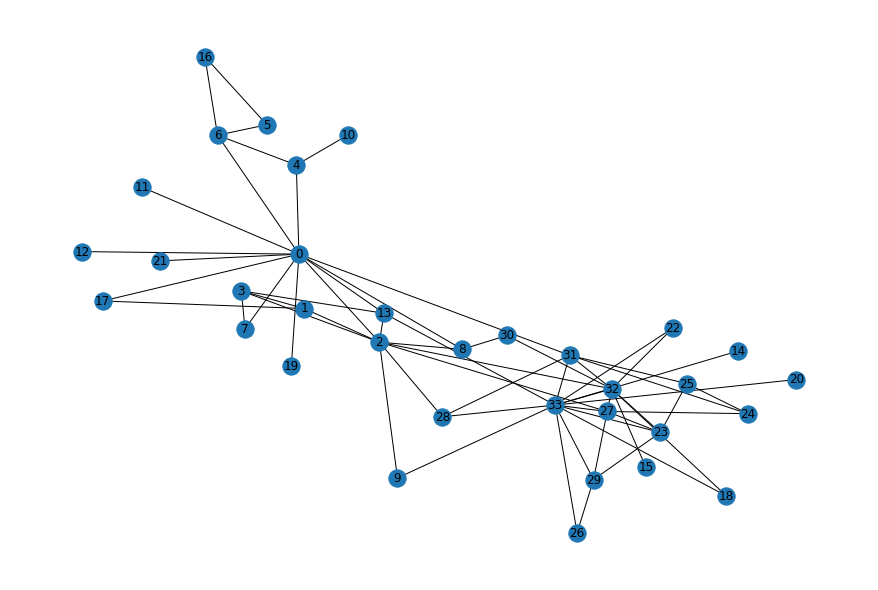

In [41]:
plt.figure(figsize=(12, 8))
nx.draw(G_karate_train, pos=pos, with_labels=True)

In [42]:
pred_jaccard = list(nx.jaccard_coefficient(G_karate_train))
score_jaccard, label_jaccard = zip(*[(s, (u, v) in edge_subset) for (u, v, s) in pred_jaccard])
print(pred_jaccard[:10])
# print(score_jaccard[:10])
# print(label_jaccard[:10])

# label_jaccard = list(label_jaccard)
# label_jaccard[0] = True
# label_jaccard[1] = True
# label_jaccard[2] = True
# label_jaccard = tuple(label_jaccard)

print(label_jaccard[:10])

[(0, 1, 0.15384615384615385), (0, 3, 0.23076923076923078), (0, 5, 0.07692307692307693), (0, 9, 0.07692307692307693), (0, 10, 0.08333333333333333), (0, 14, 0.0), (0, 15, 0.0), (0, 16, 0.07692307692307693), (0, 18, 0.0), (0, 20, 0.0)]
(True, True, True, False, True, False, False, False, False, False)


In [43]:
fpr_jaccard, tpr_jaccard, _ = roc_curve(label_jaccard, score_jaccard, pos_label=True)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)
print(auc_jaccard)
print(label_jaccard[:10])

0.5707202789582652
(True, True, True, False, True, False, False, False, False, False)


In [44]:
pred_adamic = list(nx.adamic_adar_index(G_karate_train))
score_adamic, label_adamic = zip(*[(s, (u, v) in edge_subset) for (u, v, s) in pred_adamic])
print(pred_adamic[:10])
print(label_adamic[:10])

[(0, 1, 1.897814654202382), (0, 3, 2.6191621746468634), (0, 5, 0.7213475204444817), (0, 9, 0.45511961331341866), (0, 10, 0.9102392266268373), (0, 14, 0), (0, 15, 0), (0, 16, 0.7213475204444817), (0, 18, 0), (0, 20, 0)]
(True, True, True, False, True, False, False, False, False, False)


In [45]:
fpr_adamic, tpr_adamic, _ = roc_curve(label_adamic, score_adamic, pos_label=True)
auc_adamic = roc_auc_score(label_adamic, score_adamic)
print(auc_adamic)

0.6802331916748392


In [46]:
pred_pref = list(nx.preferential_attachment(G_karate_train))
score_pref, label_pref = zip(*[(s, (u, v) in edge_subset) for (u, v, s) in pred_pref])
print(pred_pref[:10])
print(label_pref[:10])

[(0, 1, 36), (0, 3, 48), (0, 5, 24), (0, 9, 24), (0, 10, 12), (0, 14, 12), (0, 15, 12), (0, 16, 24), (0, 18, 24), (0, 20, 12)]
(True, True, True, False, True, False, False, False, False, False)


In [47]:
fpr_pref, tpr_pref, _ = roc_curve(label_pref, score_pref, pos_label=True)
auc_pref = roc_auc_score(label_pref, score_pref)
print(auc_pref)

0.6993026043369293


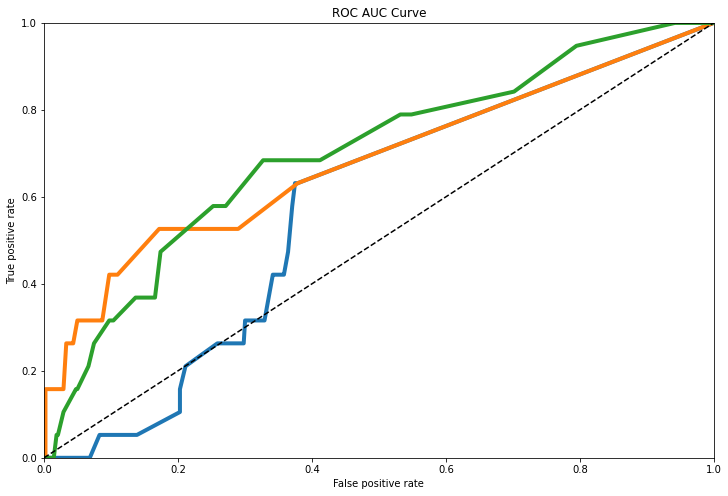

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label="Jaccard Coefficient - AUC %.2f" % auc_jaccard, linewidth = 4)
plt.plot(fpr_adamic, tpr_adamic, label="Adamic-Adar - AUC %.2f" % auc_adamic, linewidth = 4)
plt.plot(fpr_pref, tpr_pref, label="Preferential Attachment - AUC %.2f" % auc_pref, linewidth = 4)
plt.xlim([0.0, 1.0]) # 指定图的显示范围
plt.ylim([0.0, 1.0])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC AUC Curve")
plt.plot([0, 1], [0, 1], 'k--') # 画出对角虚线
# plt.legend(loc="lower right")
plt.show()

150 1693
2


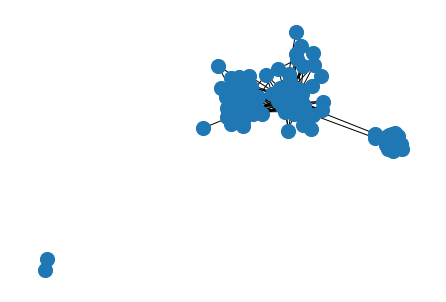

In [60]:
G_fb = nx.read_edgelist("./facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
print(n, m)
print(nx.number_connected_components(G_fb))
pos = nx.spring_layout(G_fb)
nx.draw(G_fb, pos=pos, node_size=200)

[25, 109, 55, 33, 63, 122, 5, 73, 27, 92, 126, 142, 81, 3, 116, 110, 91, 140, 34, 18, 121, 117, 58, 123, 71, 93, 102, 4, 128, 20, 67, 120, 19, 59, 144, 149, 74, 28, 48, 36, 35, 104, 32, 24, 40, 97, 139, 64, 127, 106, 72, 49, 10, 52, 8, 135, 100, 132, 15, 134, 136, 29, 50, 112, 99, 147, 68, 21, 39, 0, 111, 51, 54, 113, 7, 70, 80, 130, 138, 141, 44, 65, 96, 137, 75, 118, 101, 42, 89, 105, 129, 61, 95, 125, 38, 79, 114, 119, 13, 12, 145, 77, 43, 45, 115, 143, 9, 14, 98, 16, 108, 82, 86, 62, 131, 103, 76, 56, 66, 69, 37, 17, 53, 124, 88, 94, 57, 26, 11, 2, 90, 146, 85, 1, 148, 133, 23, 6, 84, 41, 60, 107, 22, 46, 47, 30, 31, 78, 87, 83]


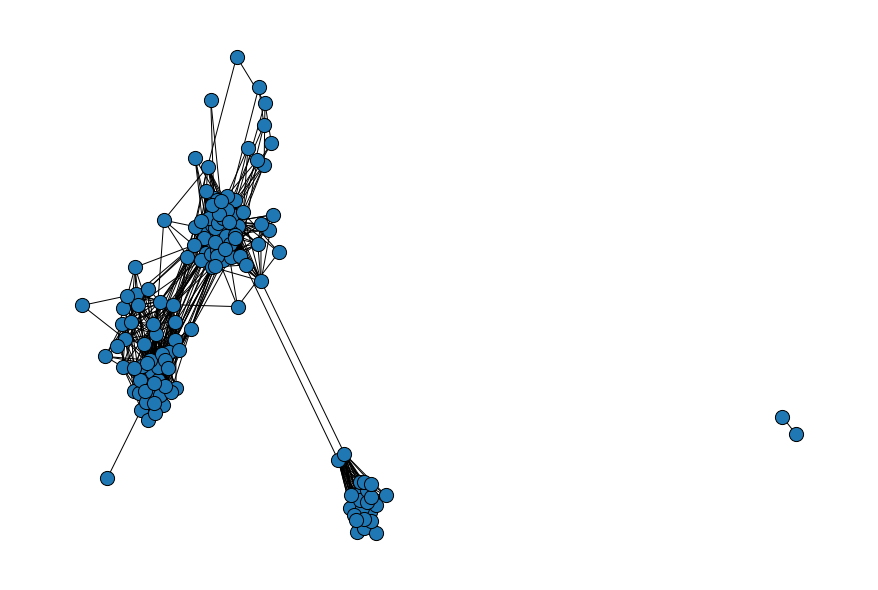

In [50]:
mapping = dict(zip(G_fb.nodes(), range(n)))
# print(len(list(mapping)))
# print(mapping)
# print(tuple(zip(G_fb.nodes(), range(n))))
nx.relabel_nodes(G_fb, mapping, copy=False)
print(G_fb.nodes)
pos = nx.spring_layout(G_fb)
plt.figure(figsize=(12, 8))
nx.draw(G_fb, pos=pos, node_size = 200)
plt.gca().collections[0].set_edgecolor("#000000")

104
104 work;start_date;anonymized feature 202



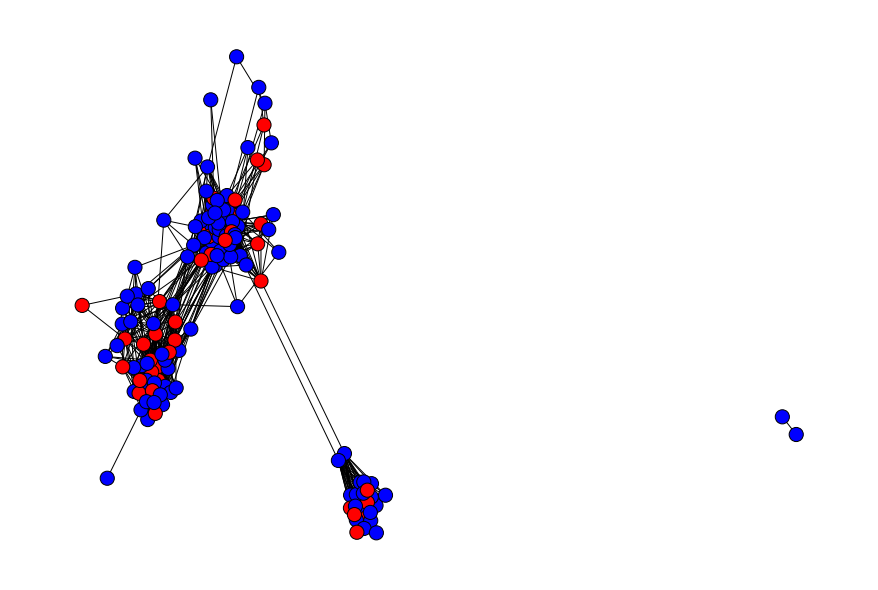

In [51]:
with open("./facebook/414.featnames") as f:
    for i, l in enumerate(f):
        pass
n_feat = i+1
print(i)
print(l)
features = np.zeros((n, n_feat))
mapping = dict(zip(range(n), G_fb.nodes()))
# print(149 in mapping)
# print(mapping)
f = open("./facebook/414.featnames", "r")
for line in f:
    if int(line.split()[0]) in mapping:
        node_id = mapping[int(line.split()[0])]
        # print(int(line.split()[0]))
        # print(node_id)
        # print(line.split()[-1])
        # print(list(map(int, line.split()[-1])))
        for t in list(map(int, line.split()[-1])):
            features[node_id, t] = 1
features = 2*features-1
feat_id = 3 # 即选取第3个特征进行二分类
labels = features[:, feat_id]
# print(labels)
plt.figure(figsize=(12,8))
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # 给小球加上白色轮廓
plt.show()

In [61]:
random.seed(5)
proportion_nodes = 0.3
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes*G_fb.number_of_nodes()))
print(mapping)

{0: 25, 1: 109, 2: 55, 3: 33, 4: 63, 5: 122, 6: 5, 7: 73, 8: 27, 9: 92, 10: 126, 11: 142, 12: 81, 13: 3, 14: 116, 15: 110, 16: 91, 17: 140, 18: 34, 19: 18, 20: 121, 21: 117, 22: 58, 23: 123, 24: 71, 25: 93, 26: 102, 27: 4, 28: 128, 29: 20, 30: 67, 31: 120, 32: 19, 33: 59, 34: 144, 35: 149, 36: 74, 37: 28, 38: 48, 39: 36, 40: 35, 41: 104, 42: 32, 43: 24, 44: 40, 45: 97, 46: 139, 47: 64, 48: 127, 49: 106, 50: 72, 51: 49, 52: 10, 53: 52, 54: 8, 55: 135, 56: 100, 57: 132, 58: 15, 59: 134, 60: 136, 61: 29, 62: 50, 63: 112, 64: 99, 65: 147, 66: 68, 67: 21, 68: 39, 69: 0, 70: 111, 71: 51, 72: 54, 73: 113, 74: 7, 75: 70, 76: 80, 77: 130, 78: 138, 79: 141, 80: 44, 81: 65, 82: 96, 83: 137, 84: 75, 85: 118, 86: 101, 87: 42, 88: 89, 89: 105, 90: 129, 91: 61, 92: 95, 93: 125, 94: 38, 95: 79, 96: 114, 97: 119, 98: 13, 99: 12, 100: 145, 101: 77, 102: 43, 103: 45, 104: 115, 105: 143, 106: 9, 107: 14, 108: 98, 109: 16, 110: 108, 111: 82, 112: 86, 113: 62, 114: 131, 115: 103, 116: 76, 117: 56, 118: 66, 

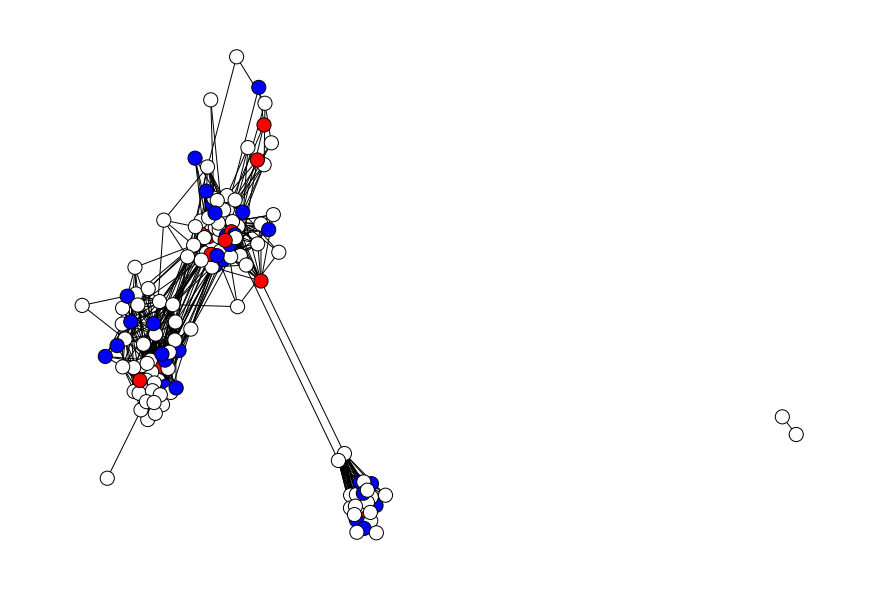

In [53]:
known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]
# print(known_labels)
plt.figure(figsize=(12, 8))
nx.draw(G_fb, pos=pos, cmap = plt.get_cmap("bwr"), nodelist = range(n), node_color = known_labels, node_size = 200)
plt.gca().collections[0].set_edgecolor("#000000")
plt.show()

In [54]:
# from scipy.sparse import coo_array
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)
Y = np.zeros((n, 2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1
# print(Y)
I = np.identity(n)
F_pred = np.linalg.inv((1-alpha)*I + L_sym)*Y
pred = np.array(np.argmax(F_pred, axis=1)*2-1).flatten()
succ_rate = accuracy_score(labels, pred)
print(succ_rate)
# print(F_pred)

0.8066666666666666


<class 'networkx.utils.decorators.argmap'> compilation 44:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


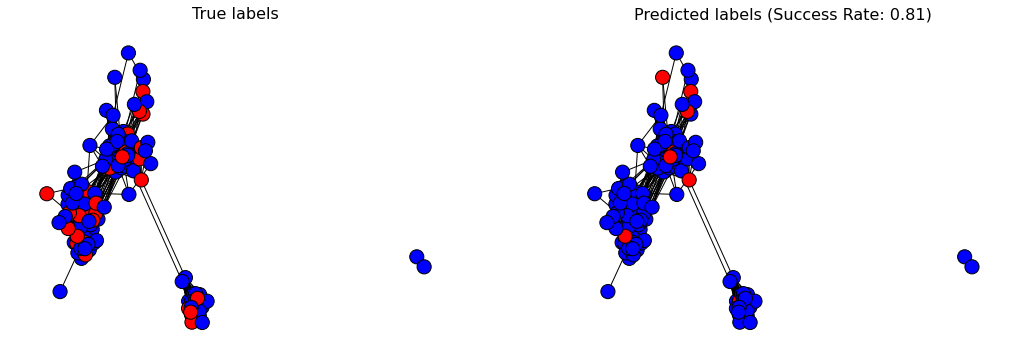

In [55]:
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)

plt.sca(axarr[0]) # 画第一张图
nx.draw(G_fb, cmap=plt.get_cmap("bwr"), nodelist=range(n), node_color = labels, node_size = 200, pos = pos)
axarr[0].set_title('True labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000")

plt.sca(axarr[1]) # 画第二张图
nx.draw(G_fb, cmap=plt.get_cmap("bwr"), nodelist=range(n), node_color = pred, node_size = 200, pos = pos)
axarr[1].set_title("Predicted labels (Success Rate: %.2f)" % succ_rate, size=16)
plt.gca().collections[0].set_edgecolor("#000000")